In [211]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [212]:
%run ./func_v2.ipynb

<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\adachi\AppData\Local\Temp\ipykernel_18256\3931784478.py:3: SyntaxWarning: invalid escape sequence '\h'
  """Gradient of \hat{L} with respect to x (ascent direction)."""
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\adachi\AppData\Local\Temp\ipykernel_18256\3060062321.py:3: SyntaxWarning: invalid escape sequence '\h'
  """Gradient of \hat{L} with respect to y (descent direction)."""
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\adachi\AppData\Local\Temp\ipykernel_18256\4190295861.py:3: SyntaxWarning: invalid escape sequence '\h'
  """Evaluate the objective \hat{L}(x, y)."""


In [213]:
D, J = 50,50

# a side of the grid
num_rows_columns = 50

In [214]:
alpha = 0
beta = 0.1

p = 3
r = 3

h = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [215]:
# SEED = 422
# np.random.seed(SEED)

x0 = np.random.rand(J)
y0 = np.random.rand(J)

In [216]:
x_final, y_final, obj_final_relaxed, x_proj, y_proj, obj_final_binary, obj_final_ex, candidate_sites, demand_points, history = lgda_solver(
    x0, y0,
    D, J, num_rows_columns,
    p, r,
    alpha, beta,
    h, J_L, J_F,
    eta_x=0.05, eta_y=0.05,
    mu=.5,
    max_iter=100000,
    tau_interval=100,
    return_history=True
)

In [217]:
print("\nFinal releaxed x:", x_final)
print("Final releaxed y:", y_final)
print("Projected x:", x_proj)
print("Projected y:", y_proj)
print("Optimal obj relaxed:", obj_final_relaxed)
print("Optimal obj binary:", obj_final_binary)
print("Optimal obj EX:", obj_final_ex)
# print("\nHistory of dx:", history["dx"])
print('objective:', history["objective"][-1])
print("num of iter:", len(history["objective"]))


Final releaxed x: [0.06505561 0.11346411 0.08360296 0.         0.10176383 0.
 0.00218211 0.11092687 0.05264967 0.12759115 0.0736512  0.04151153
 0.06334488 0.06805983 0.07908704 0.11153277 0.12989825 0.09904729
 0.14569607 0.         0.04750948 0.05611934 0.08601621 0.13550761
 0.00772983 0.00640474 0.         0.01111266 0.04459567 0.
 0.         0.05930533 0.12399302 0.06638898 0.12051682 0.
 0.06989415 0.02701652 0.01812261 0.13504654 0.         0.10603888
 0.04198047 0.05461638 0.0797424  0.02730502 0.         0.
 0.09818052 0.10779169]
Final releaxed y: [0.07961192 0.0835393  0.05398795 0.         0.05939077 0.
 0.08749095 0.06462506 0.1106071  0.05998439 0.06723082 0.072172
 0.06347555 0.08380708 0.07440014 0.05138684 0.05080038 0.06006195
 0.06893642 0.         0.057965   0.05784028 0.04946281 0.0651174
 0.08169655 0.13250672 0.         0.07889688 0.06477281 0.
 0.09225795 0.05117147 0.0407346  0.07325145 0.05715953 0.12413326
 0.05426995 0.11188309 0.08572821 0.06682044 0.     

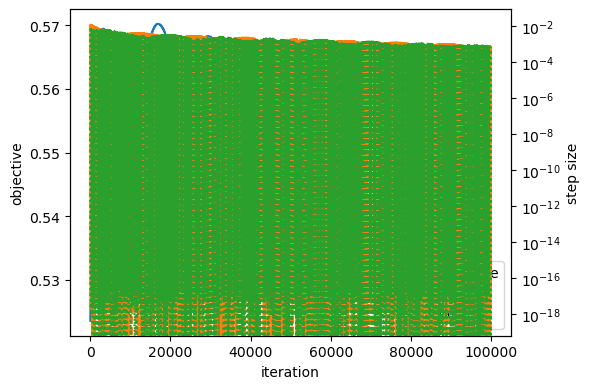

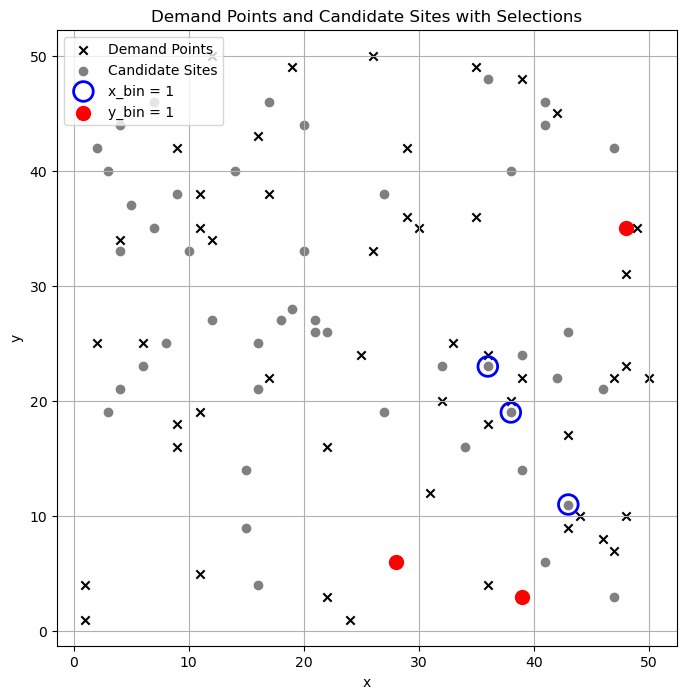

In [218]:
plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)
plot_facility_selection(candidate_sites, demand_points, x_proj, y_proj)

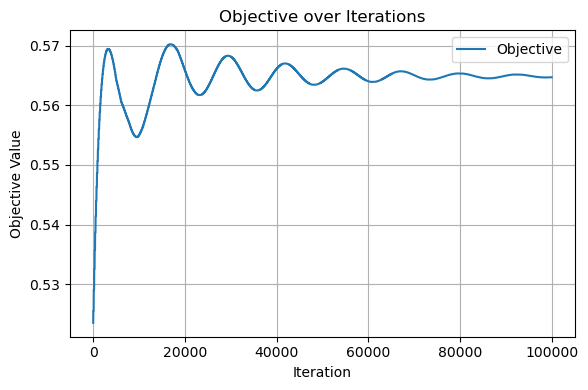

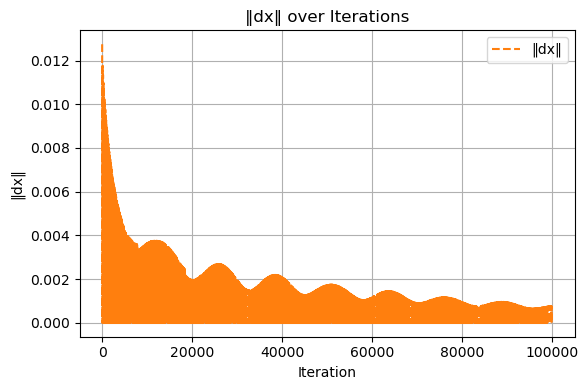

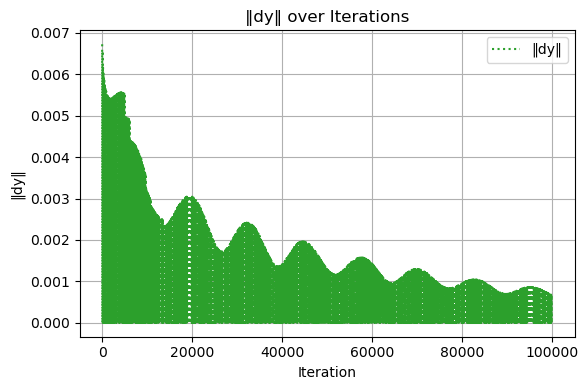

In [219]:
plot_each_history_component_separately(history)

In [220]:
"""create_history_evolution_gif(
    x0=x0,
    y0=y0,
    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),
    Ui_L=Ui_L,
    Ui_F=Ui_F,
    h_i=h_i,
    p=p,
    r=r,
    fixed_param='alpha',
    fixed_value=0.01,
    var_range=np.linspace(0.001, 2.0, 100),
    filename="varying_mu.gif",
    eta_x=0.01,
    eta_y=0.01,
    mu=0.01,
    max_iter=1000,
    tau_interval=50,
    logy=False,
    mode="mu"
)
"""

'create_history_evolution_gif(\n    x0=x0,\n    y0=y0,\n    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),\n    Ui_L=Ui_L,\n    Ui_F=Ui_F,\n    h_i=h_i,\n    p=p,\n    r=r,\n    fixed_param=\'alpha\',\n    fixed_value=0.01,\n    var_range=np.linspace(0.001, 2.0, 100),\n    filename="varying_mu.gif",\n    eta_x=0.01,\n    eta_y=0.01,\n    mu=0.01,\n    max_iter=1000,\n    tau_interval=50,\n    logy=False,\n    mode="mu"\n)\n'